# Interpreting the Dataset
In these exercises, you will work with sales data from a marketplace with several stores.  The attached CSV file lists the customer, date, and dollar value of orders placed in 2017. Assume that there is only one product in each order. The store ID and product ID are also included for each ordered product. The gender of each customer is also provided. Please do not exclude $0 orders.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

from scipy import stats

In [2]:
#listing files in the folder
os.listdir()

['screening_exercise_orders_v202101.csv',
 'try.csv',
 '.DS_Store',
 '.ipynb_checkpoints',
 'KlaviyoDataScientistExercise_try0122.ipynb',
 'KlaviyoDataScientistExercise_-_Solutions.ipynb']

In [3]:
#importing data as a dataframe
df = pd.read_csv('screening_exercise_orders_v202101.csv')
df.head()

,customer_id,gender,date,product_value,store_id,product_id,product_is_red
0,1000,0,2017-01-01 00:11:31,72.346503,5,516,True
1,1001,0,2017-01-01 00:29:56,326.006005,2,287,False
2,1002,1,2017-01-01 01:30:31,420.453635,4,450,False
3,1003,1,2017-01-01 01:34:22,377.703064,0,81,True
4,1004,0,2017-01-01 03:11:54,35.620216,7,743,False


In [4]:
df.dtypes

customer_id         int64
gender              int64
date               object
product_value     float64
store_id            int64
product_id          int64
product_is_red       bool
dtype: object

In [5]:
#checking if there's null value in data
df.isnull().count()

customer_id       13471
gender            13471
date              13471
product_value     13471
store_id          13471
product_id        13471
product_is_red    13471
dtype: int64

In [6]:
df.shape

(13471, 7)

In [7]:
#As we can see from the above, there's no null value in the data. So we will be dealing with the full data.

### Exercise 1
Assemble a dataframe with one row per customer and the following columns:
* customer_id 
* gender
* most_recent_order_date 
* order_count (number of orders placed by this customer)

Sort the dataframe by customer_id ascending and display the first 10 rows.

In [8]:
# Since we need one row per customer, we can group by CustomerID and gender to meet the requirement.
# And aggregate the most recent order date and total order number by customer.
sorted_df = df.groupby(['customer_id', 'gender']).agg(most_recent_order_date=('date', 'max'), order_count=('customer_id', 'count'))

# Sorted by customer_id
sorted_df = sorted_df.sort_values(['customer_id'])
sorted_df.head(10)

,,most_recent_order_date,order_count
customer_id,gender,,
1000,0,2017-01-01 00:11:31,1
1001,0,2017-01-01 00:29:56,1
1002,1,2017-02-19 21:35:31,3
1003,1,2017-04-26 02:37:20,4
1004,0,2017-01-01 03:11:54,1
1005,1,2017-12-16 01:39:27,2
1006,1,2017-05-09 15:27:20,3
1007,0,2017-01-01 15:59:50,1
1008,0,2017-12-17 05:47:48,3


### Exercise 2
Plot the total order count for the marketplace by week. Do not use plotly, as plotly graphs in Jupyter Notebooks don't render correctly on different machines.

In [9]:
# As we checked above, we need to change the datatype of date to 'datetime'
df['date'] = pd.to_datetime(df['date'])
df.dtypes

customer_id                int64
gender                     int64
date              datetime64[ns]
product_value            float64
store_id                   int64
product_id                 int64
product_is_red              bool
dtype: object

In [10]:
# Since we need our result by week, we add a week column
df['week'] = df.date.dt.strftime('%Y/%W')

In [11]:
# Grouping by week and counting the total order for each week
weekly_df = df.groupby(['week']).agg(total_orders_by_week = ('customer_id', 'count'))
weekly_df

,total_orders_by_week
week,
2017/00,14
2017/01,180
2017/02,264
2017/03,405
2017/04,233
2017/05,211
2017/06,195
2017/07,248
2017/08,315


In [12]:
# week 0 means days before the first Monday of the year

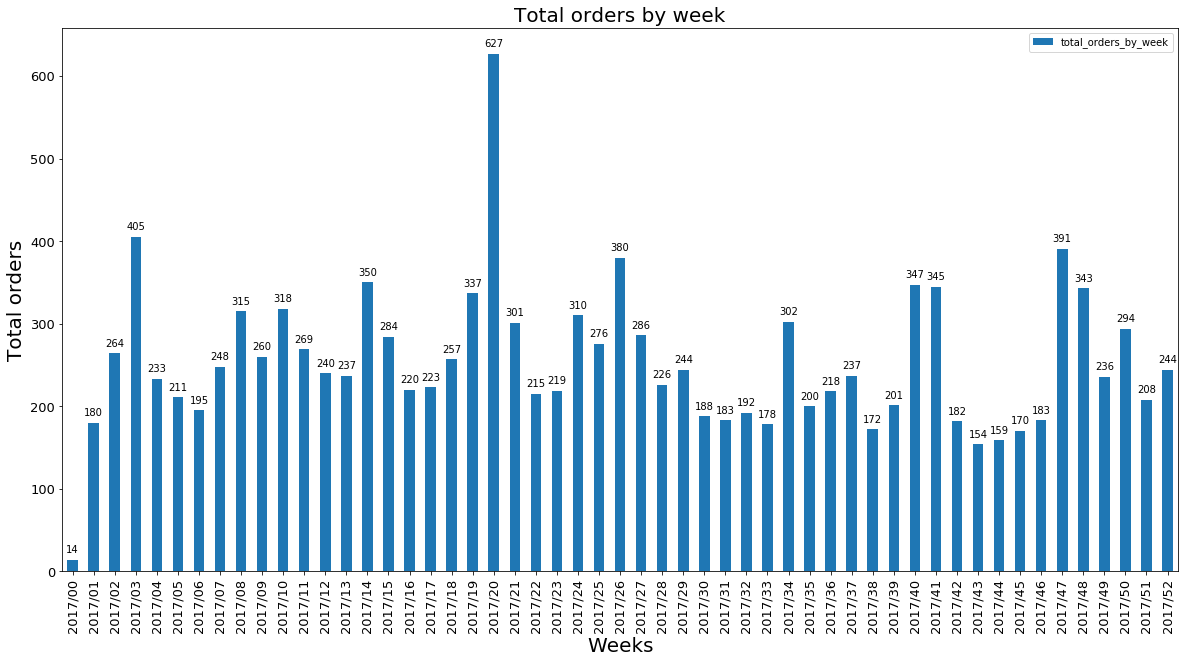

In [13]:
# Plotting a bar graph 
weekly_bar= weekly_df.plot.bar(figsize=(20,10), fontsize=13)

# Adding numeric labels on bars
for p in weekly_bar.patches: 
    weekly_bar.annotate(np.round(p.get_height(),decimals=2), 
                        (p.get_x()+p.get_width()/2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel("Weeks", fontsize=20)
plt.ylabel("Total orders", fontsize=20)
plt.title('Total orders by week', fontsize=20)

plt.show()

### Exercise 3

Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? 

**Justify your choice of method and state any assumptions you make**.

In [14]:
# Calculating the mean order value for each gender
mean_value = df.groupby("gender").agg(mean_value = ("product_value", "mean"))
mean_value

,mean_value
gender,
0,446.427906
1,462.592734


In [15]:
# We can see from the result that there's almost 16 difference between gender 0 and 1. Meaning that there are
#16 more people with gender 1 than people with gender 0 when purchasing a product. 

In [16]:
# I'll perform null hypothesis, which proposes that no significant difference exists in a set of given observations.
#t-test to check whether the difference is significant:
# H0：order value means are equal (difference is not significant)
# H1：order value means are not equal (difference is significant)
# Set critical value to 0.05

# And I'll do a t-test:
# t = (x1 — x2) / (σ / √n1 + σ / √n2), where
# x1 = mean of sample 1
# x2 = mean of sample 2
# n1 = size of sample 1
# n2 = size of sample 2

# size of the sample
n = (df['customer_id'].count())/2

# mean of each sample
x0 = df.groupby('gender')['product_value'].mean()[0]
x1 = df.groupby('gender')['product_value'].mean()[1]

# variation of each sample
v0 = df.groupby('gender')['product_value'].var(ddof=1)[0]
v1 = df.groupby('gender')['product_value'].var(ddof=1)[1]

# standard deviation 
sd = np.sqrt((v0 + v1)/2)

# t value
t = (x0 - x1)/(sd*np.sqrt(2/n))

# p value
p = stats.t.sf(np.abs(t), n-1)*2

print('t-value:' + str(t))
print('p-value:' + str(p))

t-value:-1.972355709413543
p-value:0.04860986193733407


In [17]:
# From the above result we can see the p-value is 0.048 which is less than the critical value of 0.05. 
# This means there is only a 4.8% probability that the results from an experiment happened by chance.
# Therefore, the difference is significant.

### Exercise 4

Suppose that some of our customers told us that they believe red products are more eye-catching and therefore easier to sell. Based on the dataset provided, would you suggest that companies should color more of their products red? Why or why not and what other factors could be important to determine this? 

**Please justify your answer and state any assumptions you make.**

In [18]:
# To determine whether 'red' is easier to sell, we first look into total count of orders based on color

# total order count
color_order_df = df.groupby(['product_is_red']).agg(order_count=('customer_id', 'count'), mean_product_value=('product_value', 'mean'), gender_dist=('gender', 'mean'))
color_order_df

,order_count,mean_product_value,gender_dist
product_is_red,,,
False,5904,437.911450,0.501355
True,7567,467.411055,0.495837


In [19]:
# From the result above, there's significant difference between whether the product is red or not.
# To figure out whether the orders are determined by products' color, I check what features the best-sellers have.

# top sellers' features
top_df = df.groupby(['product_id', 'product_value', 'store_id', 'product_is_red']).agg(sale_count=('customer_id', 'count'))
top_df = top_df.sort_values(['sale_count'], ascending=False)
top_df.head(20)

,,,,sale_count
product_id,product_value,store_id,product_is_red,
46,299.163311,0,True,38
92,164.747894,0,True,37
95,779.339167,0,True,37
28,740.527399,0,True,37
23,307.090482,0,True,34
82,182.079512,0,True,34
31,334.491408,0,True,33
80,213.183164,0,True,33
84,500.414169,0,True,33


In [20]:
# We can tell the top 20 selling products have two main features: Color is red & Sell from store 0

In [21]:
# worst sellers' feature
worst_df = top_df.sort_values(['sale_count'], ascending=True)
worst_df.head(20)

,,,,sale_count
product_id,product_value,store_id,product_is_red,
414,475.067352,4,True,1
362,212.803881,3,False,2
423,121.206881,4,True,2
418,314.761137,4,True,2
476,220.667131,4,True,2
361,406.818961,3,False,2
397,838.611595,3,False,2
300,1422.020606,3,False,2
372,915.214715,3,False,2


In [22]:
# We can tell the color of the product is not a determined features for the worst 20 selling products, but most of
#them are from store 3 and store 4. Therefore, store location's impact might bigger than color.

In [23]:
# Since almost all the bestsellers are sold in one place, I check the store 0 as below:

# store 0 features
store0_df = df.loc[df['store_id'] == 0]
store0_df = store0_df.groupby(['product_id', 'store_id', 'product_value', 'product_is_red']).agg(sale_count=('customer_id', 'count'))
store0_df = store0_df.sort_values(['sale_count'], ascending=False)

store0_df.head(15)

,,,,sale_count
product_id,store_id,product_value,product_is_red,
46,0,299.163311,True,38
28,0,740.527399,True,37
95,0,779.339167,True,37
92,0,164.747894,True,37
82,0,182.079512,True,34
23,0,307.090482,True,34
73,0,164.550298,True,33
80,0,213.183164,True,33
31,0,334.491408,True,33


In [24]:
# We can see all products in store 0 are Red.

In [25]:
# From the result above, I conclude that the color of the product is not the only factor that determines the sales 
#of the product, the store is also important. 
# Check the stores and their total sale count
store_df = df.groupby(['store_id']).agg(total_sale_value=('product_value', 'sum'), sale_count=('customer_id', 'count'))
store_df = store_df.sort_values(['sale_count'], ascending=False)
store_df.head(20)

,total_sale_value,sale_count
store_id,,
0,1.308103e+06,2679
2,7.722500e+05,1852
5,8.484260e+05,1733
7,7.554235e+05,1629
6,6.594685e+05,1473
1,6.482623e+05,1394
8,4.834126e+05,1227
4,3.535923e+05,783
3,2.933901e+05,701


In [26]:
# Store 0 has the top sales volume, but its total sales are the lowest
# Instead, store 5 has the highest sales with only 1733 sales volume.

In [27]:
#  store 5
store5_df = df.loc[df['store_id'] == 5]
store5_df = store5_df.groupby(['product_id', 'store_id', 'product_value', 'product_is_red']).agg(sale_count=('customer_id', 'count'))
store5_df = store5_df.sort_values(['sale_count'], ascending=False)

store5_df.head(15)

,,,,sale_count
product_id,store_id,product_value,product_is_red,
500,5,237.726757,False,32
504,5,172.910785,True,30
598,5,258.523875,True,26
585,5,263.367445,True,26
562,5,123.457637,False,25
581,5,263.231162,False,24
542,5,498.654846,False,24
515,5,278.934185,True,23
551,5,889.884094,False,23


In [28]:
# From the above results, I would not suggest company color more product red. Because the color is not the only 
#factor that determine the sales. Store location also has big impact on customer's choice. 